In [8]:
import logic.gwyfile as gwyfile
import numpy as np
from logic.gwyfile.objects import GwyContainer, GwyDataField
import matplotlib.pyplot as plt

Read and displace gwyddion data

In [15]:
path = 'G:\\Data\\Qudi_Data\\2023\\04\\20230421\\AttoDRY2200_Pi3_SPM\\'
filebeginning = '20230421-1301-32_FST_QAFM' #here the beginning of the filename, including the date and sample name, is needed
filepath = path + filebeginning
# Load a Gwyddion file into memory
obj = gwyfile.load(filepath+'.gwy')
# Return a dictionary with the datafield titles as keys and the
# datafield objects as values.
channels = gwyfile.util.get_datafields(obj)
print(channels)

{'b_field_fw:Magnetic field ': GwyDataField([('xreal', 2.9999999999999992e-06), ('yreal', 1.0000000000000116e-08), ('xoff', 5e-06), ('yoff', 1e-06), ('si_unit_xy', GwySIUnit([('unitstr', 'm')])), ('si_unit_z', GwySIUnit([('unitstr', 'G')])), ('xres', 150), ('yres', 20), ('data', array([44.00004923, 44.05521835, 43.97212132, ..., 43.36478028,
       43.51546937, 43.38226452]))]), 'counts_fw:Counts': GwyDataField([('xreal', 2.9999999999999992e-06), ('yreal', 1.0000000000000116e-08), ('xoff', 5e-06), ('yoff', 1e-06), ('si_unit_xy', GwySIUnit([('unitstr', 'm')])), ('si_unit_z', GwySIUnit([('unitstr', 'c/s')])), ('xres', 150), ('yres', 20), ('data', array([83400., 92400., 91000., ..., 41600., 39200., 36800.]))]), 'Height(Dac)_fw:Height': GwyDataField([('xreal', 2.9999999999999992e-06), ('yreal', 1.0000000000000116e-08), ('xoff', 5e-06), ('yoff', 1e-06), ('si_unit_xy', GwySIUnit([('unitstr', 'm')])), ('si_unit_z', GwySIUnit([('unitstr', 'm')])), ('xres', 150), ('yres', 20), ('data', array([1

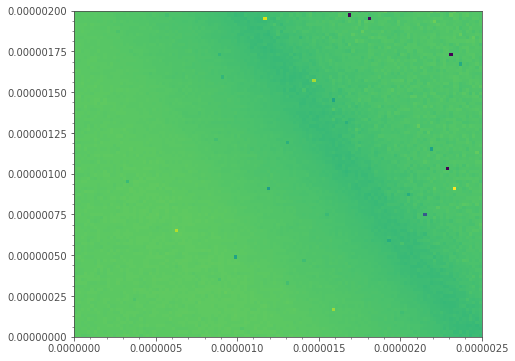

In [10]:
# Load a Gwyddion file into memory
obj = gwyfile.load(filepath+'.gwy')
# Return a dictionary with the datafield titles as keys and the
# datafield objects as values.
channels = gwyfile.util.get_datafields(obj)
channels
channel = channels['b_field_fw:Magnetic field ']
# Datafield objects have a `data` property to access their
# two-dimensional data as numpy arrays.
data = channel.data

fig, ax = plt.subplots()
ax.imshow(data, interpolation='none', origin='upper',
        extent=(0, channel.xreal, 0, channel.yreal))
plt.show()

Create Gwyddion data with noise

In [13]:
obj = GwyContainer()
obj['/0/data/title'] = 'Noise'
data = np.random.normal(size=(256, 256))
obj['/0/data'] = GwyDataField(data)
obj['/1/data/title'] = 'Noise2'
data = np.random.normal(size=(256, 256))
obj['/1/data'] = GwyDataField(data)
obj.tofile(path+'noise.gwy')

CreateGwyddion data with data

In [ ]:
def initialize_qafm_scan_array(x_start, x_stop, num_columns, y_start, y_stop, num_rows):
        """ Initialize the qafm scan array. 

        @param int num_columns: number of columns, essentially the x resolution
        @param int num_rows: number of columns, essentially the y resolution
        """


        coord0_arr = np.linspace(x_start, x_stop, num_columns, endpoint=True)
        coord1_arr = np.linspace(y_start, y_stop, num_rows, endpoint=True)

        #FIXME: use Tesla not Gauss, right not, this is just for display purpose
        # add counts to the parameter list
        meas_params_units = {'Height(Dac)' : {'measured_units' : 'µm',
                                              'scale_fac': 1e-6,    # multiplication factor to obtain SI units   
                                              'si_units': 'm', 
                                              'nice_name': 'Height'}
                            }

        meas_params = list(meas_params_units)

        meas_dir = ['fw', 'bw']
        meas_dict = {}

        for direction in meas_dir:
            for param in meas_params:

                name = f'{param}_{direction}' # this is the naming convention!

                meas_dict[name] = {'data': np.zeros((num_rows, num_columns))}
                #meas_dict[name] = {'data': np.random.rand(num_rows, num_columns)}
                meas_dict[name]['coord0_arr'] = coord0_arr
                meas_dict[name]['coord1_arr'] = coord1_arr
                meas_dict[name]['corr_plane_coeff'] = [0.0, 0.0, 0.0] 
                meas_dict[name]['image_correction'] = False
                meas_dict[name].update(meas_params_units[param])
                meas_dict[name]['params'] = {}
                meas_dict[name]['display_range'] = None

        return meas_dict

In [ ]:
coord0_start = 0
coord0_stop = 1e-6
coord0_num = 10
coord1_start = 0
coord1_stop = 1e-6
coord1_num = 10

data_array = initialize_qafm_scan_array(coord0_start,
                                        coord0_stop,
                                        coord0_num,
                                        coord1_start,
                                        coord1_stop,
                                        coord1_num)
for entry in data_array:
    data_array[entry]['params']['Parameters for'] = 'QAFM measurement'
    data_array[entry]['params']['axis name for coord0'] = 'X'
    data_array[entry]['params']['axis name for coord1'] = 'Y'
    data_array[entry]['params']['measurement plane'] = 'XY'
    data_array[entry]['params']['coord0_start (m)'] = coord0_start
    data_array[entry]['params']['coord0_stop (m)'] = coord0_stop
    data_array[entry]['params']['coord0_num (#)'] = coord0_num
    data_array[entry]['params']['coord1_start (m)'] = coord1_start
    data_array[entry]['params']['coord1_stop (m)'] = coord1_stop
    data_array[entry]['params']['coord1_num (#)'] = coord1_num


for i in range(coord0_num):
    for j in range(coord1_num):
        data_array['Height(Dac)_fw']['data'][i,j] = np.random.normal()
        

for i in range(coord0_num):
    for j in range(coord1_num):
        data_array['Height(Dac)_bw']['data'][i,j] = np.random.normal()

In [ ]:
filename = 'AFM_data.gwy'
dataobj = data_array
datakeys = None
gwytypes = ['image','xyz']


datakeys = list(dataobj.keys())
objout = GwyContainer()

for dataki,datak in enumerate(sorted(datakeys, key=str.lower)):
    meas = dataobj[datak]

    # check that data is valid
    if not {'coord0_arr','coord1_arr','data'}.issubset(set(meas.keys())):
        continue 

    # check that there is non-trivial data (skip empty measurements)
    if np.sum(meas['data']) == 0.0:
        continue
#     print(datak)
#     print(meas)
    coord0 = meas['coord0_arr']
    coord1 = meas['coord1_arr']
    data_si = meas['data']
    
    params = meas['params']
    coord0_start = next(k for k in params.keys() if k.startswith('coord0_start'))
    coord0_stop = next(k for k in params.keys() if k.startswith('coord0_stop'))
    coord1_start = next(k for k in params.keys() if k.startswith('coord1_start'))
    coord1_stop = next(k for k in params.keys() if k.startswith('coord1_stop'))
    
    xy_units = coord0_start.split('(')[1].split(')')[0]
    z_units = meas['si_units']
    measname = datak + ":" + meas['nice_name']
    
    img = GwyDataField(data=data_si, si_unit_xy=xy_units, si_unit_z=z_units)
    img.xoff = params[coord0_start]
    img.xreal = params[coord0_stop] - params[coord0_start]
    img.yoff = params[coord1_start]
    img.yreal = params[coord1_stop] - params[coord1_start]
    
    basekey = '/' + str(dataki) + '/data'
    objout[basekey + '/title'] = measname
    objout[basekey] = img

#     objout['/0/data/title'] = measname
#     objout['/0/data'] = img
    
objout.tofile(filename)

In [ ]:
obj = gwyfile.load('AFM_data.gwy')
# Return a dictionary with the datafield titles as keys and the
# datafield objects as values.
channels = gwyfile.util.get_datafields(obj)
channels

In [ ]:
# Load a Gwyddion file into memory
obj = gwyfile.load('AFM_data.gwy')
# Return a dictionary with the datafield titles as keys and the
# datafield objects as values.
channels = gwyfile.util.get_datafields(obj)
channel = channels['Height(Dac)_fw:Height']
# Datafield objects have a `data` property to access their
# two-dimensional data as numpy arrays.
data = channel.data

fig, ax = plt.subplots()
ax.imshow(data, interpolation='none', origin='upper',
        extent=(0, channel.xreal, 0, channel.yreal))
plt.show()